In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## I. Data setup

In [3]:
classes = ['angry', 'disgust', 'fear']

In [4]:
folder = 'fear' # angry, disgust, fear
path = Path('data/expressions')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500) # check whether a file in folder is image??

angry


disgust


fear


['angry', 'disgust', 'fear'] ['angry', 'disgust', 'fear'] 6826 1706


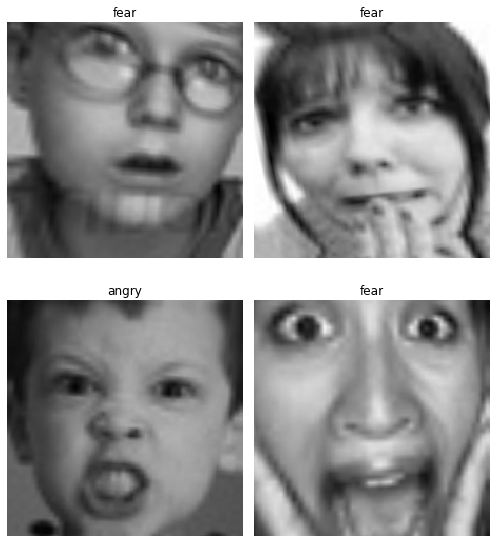

In [9]:
np.random.seed(100)
data = ImageDataBunch.from_folder(path=path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=1).normalize(imagenet_stats)

print(data.classes, data.classes, len(data.train_ds), len(data.valid_ds))
data.show_batch(rows=2, figsize=(7, 8))

## II. Train model

In [10]:
### model definition
learn = cnn_learner(data, models.resnet34)

### rough training

In [11]:
learn.fit_one_cycle(cycle_len=4)

epoch,train_loss,valid_loss,time
0,1.053072,0.823298,02:57
1,0.862792,0.763991,02:32
2,0.787094,0.750155,02:26
3,0.756224,0.742165,02:42


In [12]:
learn.save("stage1")

### fine-tune training

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


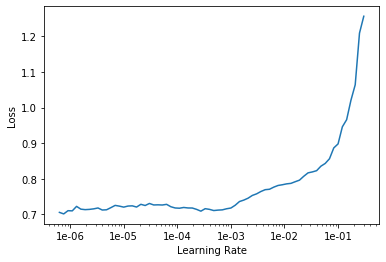

In [14]:
### find reasonable lr
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
### train
learn.fit_one_cycle(cyc_len=2, max_lr=slice(2e-5, 2e-4)) # How to select slice of lr?
# min lr: min but still affect
# max lr: max before it begin disconverging

epoch,train_loss,valid_loss,time
0,0.702066,0.664345,02:35
1,0.621882,0.636942,02:48


In [16]:
learn.save('stage2')

## III. Interpretation

In [32]:
# interp = ClassificationInterpretation.from_learner(learn) # Fail

IndexError: Traceback (most recent call last):
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/home/akiragishinichi/Programs/miniconda3/envs/fastai/lib/python3.6/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


## IV. Put model in production

In [17]:
learn.export() # model is exported into data path

In [19]:
defaults.device = torch.device('cpu')
### try to copy exported model in to different path
### then load it(OK!)
model_path = path/'models'
learn = load_learner(model_path)

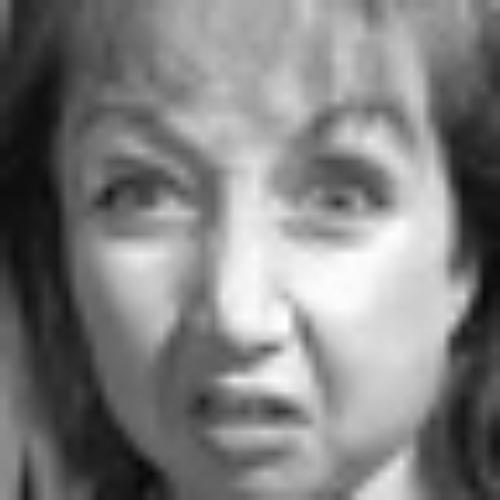

In [30]:
img = open_image(path/'disgust'/'845.jpg')
img

In [31]:
pred_class, pred_idx, outputs = learn.predict(img) # How many kinds of learn.pred?
# learn.predict, learn.predict_with_mc_dropout, learn.pred_batch
# What is difference btw pred?
pred_class

Category disgust

## What is structure tree of fastai library project?